## Initial Setup

In [58]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import numpy as np




## Reading and Merging Data

In [59]:
# Read the City Data
city_data_to_load = "data/city_data.csv"
city_pd = pd.read_csv(city_data_to_load)
city_pd.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [60]:
# Read the Ride Data
ride_data_to_load = "data/ride_data.csv"
ride_pd = pd.read_csv(ride_data_to_load)
ride_pd.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [61]:
# Combine the data into a single dataframe
merged_data = pd.merge(ride_pd, city_pd, on="city",
    how="left")
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [62]:
# use groupby to calculate four statistics by city:
     # rides, # drivers, average fare, and city type
grouped_by_city = merged_data.groupby(['city'])
by_city_df = pd.DataFrame(
    grouped_by_city["ride_id"].count())
by_city_df["total drivers"]= grouped_by_city["driver_count"].min()
by_city_df["city type"]= grouped_by_city["type"].min()
by_city_df["avg fare"]= grouped_by_city["fare"].mean ()
by_city_df.head()


,ride_id,total drivers,city type,avg fare
city,,,,
Amandaburgh,18,12,Urban,24.641667
Barajasview,22,26,Urban,25.332273
Barronchester,16,11,Suburban,36.422500
Bethanyland,18,22,Suburban,32.956111
Bradshawfurt,10,7,Rural,40.064000


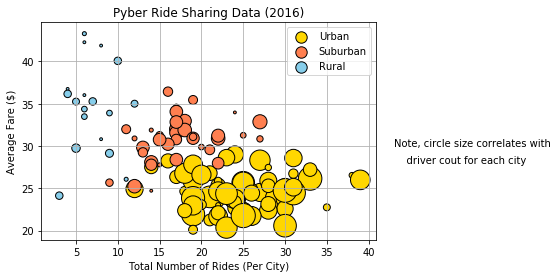

In [63]:
urban = by_city_df.loc[by_city_df["city type"] == "Urban"]
x = urban["ride_id"]
y = urban["avg fare"]
s = urban["total drivers"]
plt.scatter(x, y, s * 8, facecolor="gold", edgecolor = "black", alpha=1)
 
suburban = by_city_df.loc[by_city_df["city type"] == "Suburban"]
x = suburban["ride_id"]
s = suburban["total drivers"]
y = suburban["avg fare"]
plt.scatter(x, y, s * 8, facecolor="coral", edgecolor = "black", alpha=1)

rural = by_city_df.loc[by_city_df["city type"] == "Rural"]
x = rural["ride_id"]
y = rural["avg fare"]
s = rural["total drivers"]
plt.scatter(x, y, s * 8, facecolor="skyblue", edgecolor = "black", alpha=1)

plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(43,30,"Note, circle size correlates with")
plt.text(43,28,"    driver cout for each city")

# Plot legend.
lgnd = plt.legend(('Urban','Suburban','Rural'),loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [130]
lgnd.legendHandles[1]._sizes = [130]
lgnd.legendHandles[2]._sizes = [130]

plt.show()


## Create data frame to be used for pie charts

In [64]:
# use groupby to calculate three statistics by type

grouped_by_type = merged_data.groupby(['type'])
by_type_df = pd.DataFrame(
    grouped_by_type["ride_id"].count())
by_type_df["total fares"]= grouped_by_type["fare"].sum()

city_data_grouped_by_type = city_pd.groupby(['type'])
drivers_by_type_df = pd.DataFrame(
    city_data_grouped_by_type["driver_count"].sum())

merged_data_by_type = pd.merge(by_type_df, drivers_by_type_df, on="type",
    how="left")
merged_data_by_type.head()


,ride_id,total fares,driver_count
type,,,
Rural,125,4327.93,78
Suburban,625,19356.33,490
Urban,1625,39854.38,2405


## Total Fares by City Type

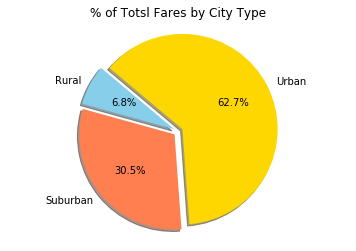

In [65]:
# data to be used fpr pie chart
labels = ["Rural","Suburban", "Urban"]
sizes = merged_data_by_type["total fares"]
colors = ["skyblue", "coral", "gold"]
explode = (0.05, 0.05, 0.05)

# crate pie chart
plt.pie(sizes, explode=explode, labels=labels,
   colors=colors,  autopct="%1.1f%%",  
  shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Totsl Fares by City Type")
plt.show()



## Total Rides by City Type

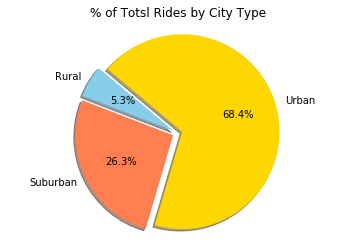

In [66]:
# data to be used fpr pie chart
labels = ["Rural","Suburban", "Urban"]
sizes = merged_data_by_type["ride_id"]
colors = ["skyblue", "coral", "gold"]
explode = (0.05, 0.05, 0.05)

# crate pie chart
plt.pie(sizes, explode=explode, labels=labels,
   colors=colors,  autopct="%1.1f%%",  
  shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Totsl Rides by City Type")
plt.show()


## Total Drivers by City Type

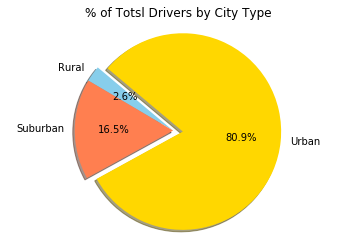

In [67]:
# data to be used fpr pie chart
labels = ["Rural","Suburban", "Urban"]
sizes = merged_data_by_type["driver_count"]
colors = ["skyblue", "coral", "gold"]
explode = (0, 0, 0.1)

# crate pie chart
plt.pie(sizes, explode=explode, labels=labels,
   colors=colors,  autopct="%1.1f%%",  
  shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Totsl Drivers by City Type")
plt.show()


## Some Comments

Urban cities tend to have more rides than suburban cities, which in turn tend to have more rides than rural cities.  This is not surprising since there are probably more people living in urban cities.  

Urban cities tend to have lower average fares than suburban cities, which in turn tend to have lower average fares than rural cities.  This probably reflects differences in the average distance per ride.

Urban cities represent about 63% of total fares, suburban 33% and rural the remaining 8%.  In terms or driver count, urban cities represent about 80% of total fares, suburban 17% and rural the remaining 3%.  Based on this, it appears that both rural and suburban drivers bring in more fares per driver than urban drivers.